In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from IPython.display import clear_output
%config NotebookApp.iopub_msg_rate_limit=10000
import time

In [2]:
movies = pd.read_json("movies.json")
reviews = pd.read_json("reviews.json")

In [3]:
reviews = reviews.drop(['timestamp'], axis=1)
reviews.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [4]:
len(reviews['user_id'].unique())

942

In [5]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
def findModes(lst, n):
    counter = Counter(lst)
    modes = counter.most_common(n)
    return [mode[0] for mode in modes]

In [7]:
#using the elbow plot I got in the last exit ticket with this same data, 3-4 was the optimal number of top movies to check

numTopMovies = 4
modes = findModes(reviews['item_id'], numTopMovies)
print(modes)
filteredReviews = reviews[reviews['item_id'].isin(modes)].copy().reset_index(drop=True)
filteredReviews.head()

[50, 258, 100, 181]


,user_id,item_id,rating
0,0,50,5
1,251,100,4
2,25,181,5
3,26,258,3
4,194,181,3


In [8]:
pivotDF = filteredReviews.pivot(index='user_id', columns='item_id', values='rating')
pivotDF.dropna(axis=0, how='all')
pivotDF.fillna(-1, inplace=True)
pivotDF.head()

item_id,50,100,181,258
user_id,,,,
0,5.0,-1.0,-1.0,-1.0
1,5.0,5.0,5.0,5.0
2,5.0,5.0,-1.0,3.0
3,-1.0,-1.0,4.0,2.0
4,5.0,-1.0,-1.0,5.0


In [28]:
def miniBatchKMeans(df, k):
    batch_size = 40
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=700)
    clusters = minibatch_kmeans.fit_predict(df)
    labels = minibatch_kmeans.fit_predict(df)
    return clusters, labels

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Prog

<AxesSubplot:>

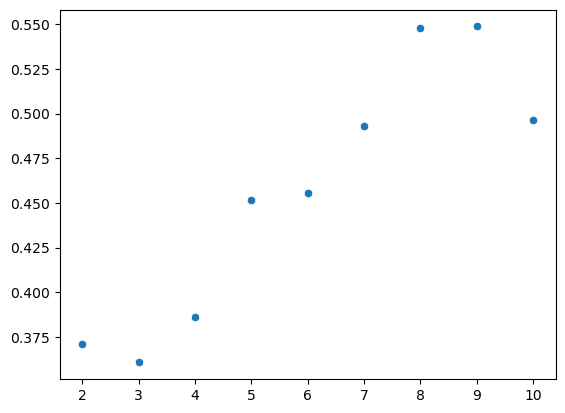

In [29]:
cluster_range = range(2, 11)

silhouette_scores = {}

for num_clusters in cluster_range:
    clusters, labels = miniBatchKMeans(pivotDF, num_clusters)
    silhouette_scores[num_clusters] = silhouette_score(pivotDF, labels)

sns.scatterplot(x=silhouette_scores.keys(), y=silhouette_scores.values())

In [39]:
clusters, labels = miniBatchKMeans(pivotDF, 8)
kMeansClusters = pivotDF.copy()
kMeansClusters.reset_index(inplace=True)
kMeansClusters['cluster'] = clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [40]:
kMeansClusters.head()

item_id,user_id,50,100,181,258,cluster
0,0,5.0,-1.0,-1.0,-1.0,7
1,1,5.0,5.0,5.0,5.0,3
2,2,5.0,5.0,-1.0,3.0,6
3,3,-1.0,-1.0,4.0,2.0,0
4,4,5.0,-1.0,-1.0,5.0,2


In [41]:
kMeansClusters.loc[kMeansClusters.loc[:,'user_id'] == 716]

item_id,user_id,50,100,181,258,cluster
638,716,5.0,-1.0,4.0,-1.0,7


In [43]:
kMeansClusters.loc[kMeansClusters.loc[:,'cluster'] == 7]

item_id,user_id,50,100,181,258,cluster
0,0,5.0,-1.0,-1.0,-1.0,7
9,9,5.0,-1.0,-1.0,-1.0,7
12,12,4.0,-1.0,-1.0,-1.0,7
20,20,3.0,-1.0,4.0,-1.0,7
33,37,5.0,-1.0,-1.0,-1.0,7
...,...,...,...,...,...,...
777,879,4.0,-1.0,4.0,-1.0,7
795,897,5.0,-1.0,3.0,-1.0,7
799,901,4.0,-1.0,4.0,-1.0,7
802,904,-1.0,-1.0,3.0,-1.0,7


In [44]:
clusterUsers = kMeansClusters.loc[kMeansClusters.loc[:,'cluster'] == 5]['user_id'].unique()
recomendDF = reviews.loc[reviews['user_id'].isin(clusterUsers)].reset_index(drop=True)
moviesSeen = recomendDF.loc[recomendDF.loc[:,'user_id'] == 186]['item_id'].unique()
recomendDF = recomendDF[~recomendDF['item_id'].isin(moviesSeen)].reset_index(drop=True)
recomendDF = recomendDF.pivot(index='user_id', columns='item_id', values='rating')
recomendDF.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1418,1420,1435,1436,1459,1478,1514,1518,1534,1658
user_id,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2.0,1.0,3.0,2.0,NaN,NaN,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
item_means = pd.DataFrame(recomendDF.mean(axis=0))
item_means

,0
item_id,
1,3.142857
2,2.500000
3,2.333333
4,2.750000
5,2.750000
...,...
1478,3.000000
1514,4.000000
1518,3.000000


In [46]:
item_means.idxmax()

0    30
dtype: int64

In [47]:
movies.loc[movies.loc[:,'item_id'] == 30]

,item_id,title
29,30,Belle de jour (1967)


In [48]:
item_means.iloc[30]

0    4.0
Name: 31, dtype: float64